In [4]:
# # Loaded variable 'df' from URI: d:\Projects\Cape Chestnut School List (1).xlsx
# import pandas as pd
# df = pd.read_excel(r'd:\Projects\Cape Chestnut School List (1).xlsx')

In [3]:
from sqlalchemy import create_engine
import pandas as pd

# Create a connection to the MySQL database
engine = create_engine("mysql+mysqlconnector://root:@localhost/cape chestnut")

# Load a table into a pandas DataFrame
df = pd.read_sql("SELECT * FROM cape_chestnut_list", engine)

df.head()


,PUPILS_NAME,PUPILS_GENDER,ADM,PARENT_S_NAME,PARENT_S_GENDER,PARENT_S_PHONE_NUMBER,D_O_B,DATE_OF_ADMISSION,TERM_1_BALANCE
0,TIFFANY KWAMBOKA OMBATI,FEMALE,196.0,ESTHER NYABOKE,F,716583920.0,None,06/01/2025,0.0
1,SHANICE SINONGE MINAYO,FEMALE,201.0,SARAPHINE KHAHOMBI,F,790907564.0,17/11/2021,06/01/2025,0.0
2,JAMES MATU MATHENGE,MALE,197.0,LUCY WANJIRU,F,796092771.0,27/10/2021,06/01/2025,0.0
3,EZRA NYAMWEYA,MALE,210.0,EZEKIEL NYAMWEA,M,724088860.0,22/11/2022,08/01/2025,6000.0
4,SHANICE WANJIKU MWIHIA,FEMALE,213.0,MARTIN MWIHIA,M,708178119.0,31/08/2021,13/01/2025,5940.0


In [ ]:
# import pandas as pd

# # Reload the original data
# original_df = pd.read_excel(r'd:\\Projects\\Cape Chestnut School List (1).xlsx')

# # Add the 'D.O.B' column back to the current DataFrame
# df['D.O.B'] = original_df['D.O.B']

In [4]:
print(df.columns)

Index(['PUPILS_NAME', 'PUPILS_GENDER', 'ADM', 'PARENT_S_NAME',
       'PARENT_S_GENDER', 'PARENT_S_PHONE_NUMBER', 'D_O_B',
       'DATE_OF_ADMISSION', 'TERM_1_BALANCE'],
      dtype='object')


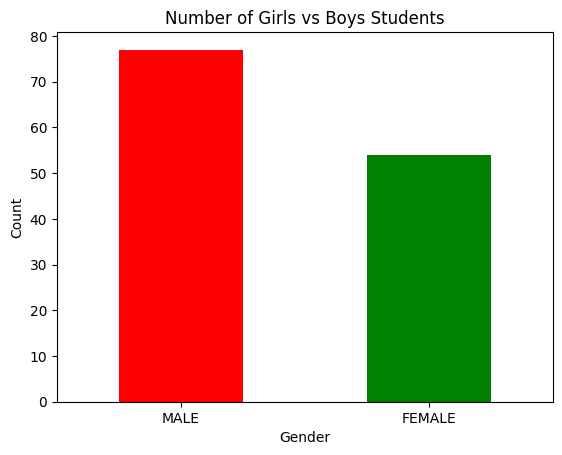

In [5]:
import matplotlib.pyplot as plt
# Count the number of boys and girls
gender_counts = df['PUPILS_GENDER'].value_counts()
# Create a bar chart
gender_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Number of Girls vs Boys Students')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [6]:
print(df.columns.tolist())


['PUPILS_NAME', 'PUPILS_GENDER', 'ADM', 'PARENT_S_NAME', 'PARENT_S_GENDER', 'PARENT_S_PHONE_NUMBER', 'D_O_B', 'DATE_OF_ADMISSION', 'TERM_1_BALANCE']


In [7]:
print(df.columns.tolist())

['PUPILS_NAME', 'PUPILS_GENDER', 'ADM', 'PARENT_S_NAME', 'PARENT_S_GENDER', 'PARENT_S_PHONE_NUMBER', 'D_O_B', 'DATE_OF_ADMISSION', 'TERM_1_BALANCE']


In [8]:
# To add columns to the dataframe
df['D_O_B'] = pd.to_datetime(df['D_O_B'], format='%d/%m/%Y', errors='coerce')
df['Age'] = 2025 - df['D_O_B'].dt.year                                        
df['Age']

0       NaN
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
146     1.0
147     NaN
148    11.0
149    12.0
150     NaN
Name: Age, Length: 151, dtype: float64

In [9]:
print(df.columns.tolist())

['PUPILS_NAME', 'PUPILS_GENDER', 'ADM', 'PARENT_S_NAME', 'PARENT_S_GENDER', 'PARENT_S_PHONE_NUMBER', 'D_O_B', 'DATE_OF_ADMISSION', 'TERM_1_BALANCE', 'Age']


In [10]:
print(df.columns.tolist())

['PUPILS_NAME', 'PUPILS_GENDER', 'ADM', 'PARENT_S_NAME', 'PARENT_S_GENDER', 'PARENT_S_PHONE_NUMBER', 'D_O_B', 'DATE_OF_ADMISSION', 'TERM_1_BALANCE', 'Age']


In [11]:
print(df['D_O_B'])

0            NaT
1     2021-11-17
2     2021-10-27
3     2022-11-22
4     2021-08-31
         ...    
146   2024-01-15
147          NaT
148   2014-01-21
149   2013-12-05
150          NaT
Name: D_O_B, Length: 151, dtype: datetime64[ns]


In [12]:
print(df[['PUPILS_NAME', 'PUPILS_GENDER']])

                  PUPILS_NAME PUPILS_GENDER
0     TIFFANY KWAMBOKA OMBATI        FEMALE
1      SHANICE SINONGE MINAYO        FEMALE
2         JAMES MATU MATHENGE          MALE
3              EZRA NYAMWEYA           MALE
4      SHANICE WANJIKU MWIHIA        FEMALE
..                        ...           ...
146              NAOMI WAMBUI        FEMALE
147    CLAIRE WANGARI NDUNG’U        FEMALE
148     SAMUEL NDIRANGU MAINA          MALE
149  LETICIA WAIRIMU NG'ANG'A        FEMALE
150                      None          None

[151 rows x 2 columns]


In [13]:
# To check for missing values in the 'D_O_B' column
print(df[df['D_O_B'].isna()])

                 PUPILS_NAME PUPILS_GENDER    ADM    PARENT_S_NAME  \
0    TIFFANY KWAMBOKA OMBATI        FEMALE  196.0  ESTHER NYABOKE    
9                       None          None    NaN             None   
10                      None          None    NaN             None   
11                       PP1          None    NaN             None   
17               JOHN THIAKA          MALE  173.0   JOSPHAT KINYUA   
23           JACKLINE WAMBUI        FEMALE  185.0      JAMES MBURU   
31                      None          None    NaN             None   
32                      None          None    NaN             None   
33                       PP2          None    NaN             None   
41              JIAN MWANIKI          MALE  166.0   ESTHER MWANIKI   
48              GIAN MWANIKI          MALE  166.0   ESTHER MWANIKI   
49             KAREN GATHONI        FEMALE  155.0   KEZIAH WANJIKU   
60                      None          None    NaN             None   
61                  

In [14]:
# Drop rows where 'D_O_B' is NaT (not a time)
df = df.dropna(subset=['D_O_B'])

In [15]:
print(df[df['D_O_B'].isna()])

Empty DataFrame
Columns: [PUPILS_NAME, PUPILS_GENDER, ADM, PARENT_S_NAME, PARENT_S_GENDER, PARENT_S_PHONE_NUMBER, D_O_B, DATE_OF_ADMISSION, TERM_1_BALANCE, Age]
Index: []


In [16]:
# To check for missing values in the 'D_O_B' column again
print(df[['PUPILS_NAME', 'D_O_B']])

                  PUPILS_NAME      D_O_B
1      SHANICE SINONGE MINAYO 2021-11-17
2         JAMES MATU MATHENGE 2021-10-27
3              EZRA NYAMWEYA  2022-11-22
4      SHANICE WANJIKU MWIHIA 2021-08-31
5           BRILLIANT MAYIANA 2021-07-27
..                        ...        ...
144           BLESSING WAIGWE 2013-09-17
145         ROY NGUMI MWENDWA 2013-11-15
146              NAOMI WAMBUI 2024-01-15
148     SAMUEL NDIRANGU MAINA 2014-01-21
149  LETICIA WAIRIMU NG'ANG'A 2013-12-05

[117 rows x 2 columns]


In [17]:
from datetime import datetime

# Ensure 'D_O_B' is in datetime format
df.loc[:, 'D_O_B'] = pd.to_datetime(df['D_O_B'], format='%d/%m/%Y', errors='coerce')

# Calculate the age
current_year = datetime.now().year
df.loc[:, 'Age'] = current_year - df['D_O_B'].dt.year

# Convert 'Age' to nullable integer type
df.loc[:, 'Age'] = df['Age'].astype('Int64')  # Convert to nullable integer type

# Display the updated DataFrame
print(df[['PUPILS_NAME', 'D_O_B', 'Age']])

                  PUPILS_NAME      D_O_B   Age
1      SHANICE SINONGE MINAYO 2021-11-17   4.0
2         JAMES MATU MATHENGE 2021-10-27   4.0
3              EZRA NYAMWEYA  2022-11-22   3.0
4      SHANICE WANJIKU MWIHIA 2021-08-31   4.0
5           BRILLIANT MAYIANA 2021-07-27   4.0
..                        ...        ...   ...
144           BLESSING WAIGWE 2013-09-17  12.0
145         ROY NGUMI MWENDWA 2013-11-15  12.0
146              NAOMI WAMBUI 2024-01-15   1.0
148     SAMUEL NDIRANGU MAINA 2014-01-21  11.0
149  LETICIA WAIRIMU NG'ANG'A 2013-12-05  12.0

[117 rows x 3 columns]


In [18]:
print(df.columns.tolist())

['PUPILS_NAME', 'PUPILS_GENDER', 'ADM', 'PARENT_S_NAME', 'PARENT_S_GENDER', 'PARENT_S_PHONE_NUMBER', 'D_O_B', 'DATE_OF_ADMISSION', 'TERM_1_BALANCE', 'Age']


In [19]:
print(df[['PUPILS_NAME', 'D_O_B', 'Age']].head())

              PUPILS_NAME      D_O_B  Age
1  SHANICE SINONGE MINAYO 2021-11-17  4.0
2     JAMES MATU MATHENGE 2021-10-27  4.0
3          EZRA NYAMWEYA  2022-11-22  3.0
4  SHANICE WANJIKU MWIHIA 2021-08-31  4.0
5       BRILLIANT MAYIANA 2021-07-27  4.0


In [20]:
if 'Age' in df.columns:
    df = df.drop(columns=['Age'])
else:
    print("Column 'Age' does not exist.")

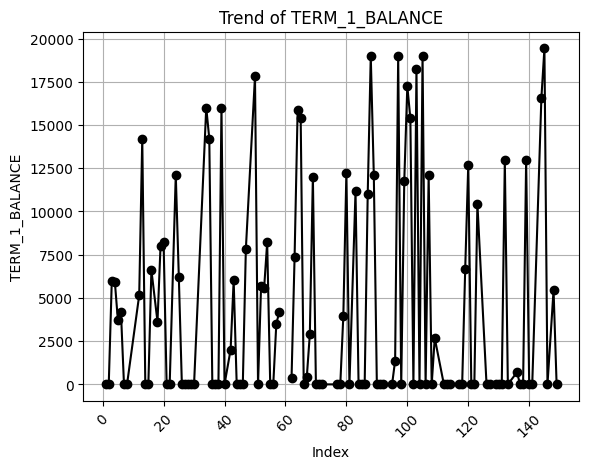

In [29]:
#Line graph to show the trend of TERM_1_BALANCE
import matplotlib.pyplot as plt
if 'TERM_1_BALANCE' in df.columns:
    plt.plot(df['TERM_1_BALANCE'], marker ='o', linestyle='-', color='black')
    plt.title('Trend of TERM_1_BALANCE')
    plt.xlabel('Index')
    plt.xticks(rotation=45)
    plt.ylabel('TERM_1_BALANCE')
    plt.grid(True)
    plt.show()
else:   
    print("Column 'TERM_1_BALANCE' does not exist.")


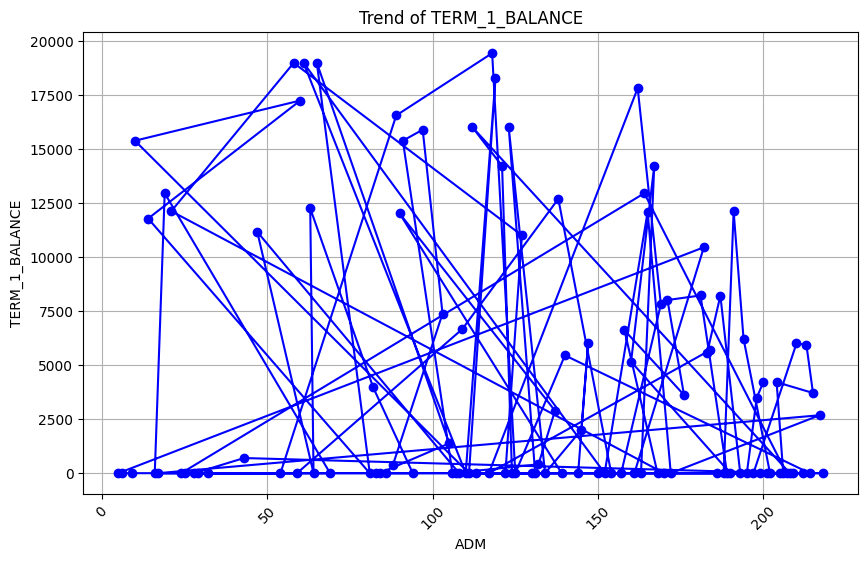

In [ ]:
import matplotlib.pyplot as plt

if 'ADM' in df.columns and 'TERM_1_BALANCE' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df['ADM'], df['TERM_1_BALANCE'], marker='o', linestyle='-', color='blue')
    plt.title('Trend of TERM_1_BALANCE')
    plt.xlabel('ADM')  
    plt.xticks(rotation=45)
    plt.ylabel('TERM_1_BALANCE')
    plt.grid(True)
    plt.show()
else:
    print("Columns 'ADM' or 'TERM_1_BALANCE' do not exist in the DataFrame.")